In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data from csv file

users = pd.read_csv('/Users/carlopastor/Desktop/user_info.csv')
products = pd.read_csv('/Users/carlopastor/Desktop/product_info.csv')
interactions = pd.read_csv('/Users/carlopastor/Desktop/interaction_data.csv')

In [3]:
#Transform Expiration Date to datetime format
products['Expiration Date'] = pd.to_datetime(products['Expiration Date'])

#creates label for each of the Interaction Type values
le = LabelEncoder()
interactions['Interaction Type'] = le.fit_transform(interactions['Interaction Type'])

#Merge interactions and products
df = pd.merge(interactions, products, on='Product ID', how='inner')

# Define the date threshold as 60 days from the current date
cutoff_date = pd.Timestamp.now() + pd.Timedelta(days=60)

# Filter out the rows that have "Expiration Date" higher than the threshold
filtered_df = df[ pd.to_datetime(df["Expiration Date"]).dt.date <= cutoff_date.date() ]
# Aggregate by product
agg_interactions = filtered_df.groupby('Product Name').agg(mean_interaction = ('Interaction Type', 'mean'),
                                                number_of_interactions = ('Interaction Type', 'count')).reset_index()

# Keep the products with more tha 50 interactions
agg_interactions_super100 = agg_interactions[agg_interactions['number_of_interactions']>50]
agg_interactions_super100.info()    

# Check the moust interact products
agg_interactions_super100.sort_values(by='number_of_interactions', ascending=False).head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product Name            101 non-null    object 
 1   mean_interaction        101 non-null    float64
 2   number_of_interactions  101 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


,Product Name,mean_interaction,number_of_interactions
17,Belkin 7 Outlet SurgeMaster II,1.468254,126
44,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1.392000,125
98,Xerox 1957,1.500000,124
49,Insertable Tab Post Binder Dividers,1.596774,124
66,Panasonic KP-380BK Classic Electric Pencil Sha...,1.487395,119


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10171 entries, 0 to 10170
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User ID                10171 non-null  int64         
 1   Product ID             10171 non-null  int64         
 2   Interaction Type       10171 non-null  int64         
 3   Interaction Timestamp  10171 non-null  object        
 4   Product Name           10171 non-null  object        
 5   Category               10171 non-null  object        
 6   Expiration Date        10171 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 635.7+ KB


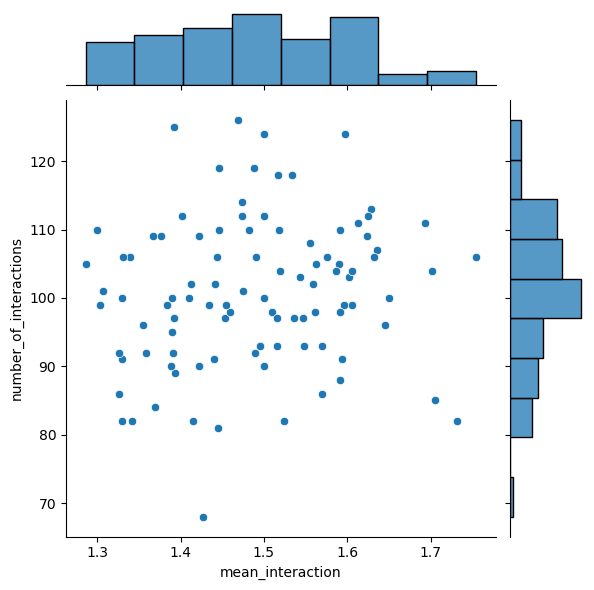

In [4]:
# Visulization
sns.jointplot(x='mean_interaction', y='number_of_interactions', data=agg_interactions_super100)

df_S10 = pd.merge(filtered_df, agg_interactions_super100[['Product Name']], on='Product Name', how='inner')
df_S10.info()


In [5]:
# Create user-item matrix
matrix = df_S10.pivot_table(index='Product Name', columns='User ID', values='Interaction Type')
matrix.head()


User ID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Product Name,,,,,,,,,,,,,,,,,,,,,
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",1.0,1.0,1.000000,0.0,NaN,3.0,NaN,NaN,3.000000,NaN,...,NaN,2.00,2.0,NaN,3.0,2.0,NaN,3.0,1.0,NaN
4009 Highlighters by Sanford,2.0,1.0,3.000000,NaN,NaN,NaN,2.0,3.0,3.000000,NaN,...,NaN,0.00,0.0,2.0,0.0,2.0,NaN,2.0,NaN,NaN
"Acco Six-Outlet Power Strip, 4' Cord Length",NaN,3.0,NaN,2.0,2.0,0.0,3.0,NaN,2.500000,NaN,...,0.0,0.75,2.0,2.0,NaN,1.5,1.0,1.5,1.0,3.0
"Adams Telephone Message Books, 5 1/4” x 11”",0.0,3.0,2.666667,NaN,3.0,2.0,NaN,NaN,2.000000,1.0,...,NaN,2.00,NaN,2.0,1.0,NaN,NaN,0.0,3.0,0.0
Adjustable Depth Letter/Legal Cart,2.0,0.5,2.500000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,NaN,0.0,1.0,NaN


In [6]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head()
# Item similarity matrix using Pearson correlation
item_similarity = matrix_norm.T.corr()
item_similarity.head()


Product Name,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",4009 Highlighters by Sanford,"Acco Six-Outlet Power Strip, 4' Cord Length","Adams Telephone Message Books, 5 1/4” x 11”",Adjustable Depth Letter/Legal Cart,"Array Parchment Paper, Assorted Colors",Artistic Insta-Plaque,Ativa V4110MDD Micro-Cut Shredder,"Atlantic Metals Mobile 4-Shelf Bookcases, Custom Colors",Avery 490,...,"Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 10/Pack","White Business Envelopes with Contemporary Seam, Recycled White Business Envelopes",Wilson Jones Easy Flow II Sheet Lifters,Wilson Jones Hanging Recycled Pressboard Data Binders,Wilson Jones Suede Grain Vinyl Binders,"Wirebound Message Book, 4 per Page",Xerox 1910,Xerox 1957,Xerox 1974,i.Sound Portable Power - 8000 mAh
Product Name,,,,,,,,,,,,,,,,,,,,,
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",1.000000,-0.060449,-0.026560,0.166564,-0.027172,-0.069942,0.349084,0.107133,-0.082674,0.002703,...,-0.043179,-0.147715,-0.107870,-0.011168,0.045894,-0.148371,-0.098681,0.063900,-0.131917,0.155975
4009 Highlighters by Sanford,-0.060449,1.000000,0.250268,-0.004031,0.120004,-0.349442,0.259028,0.013344,0.133702,0.117786,...,-0.066980,0.106960,0.029773,-0.271994,0.261150,-0.061302,0.153222,0.055314,0.121194,0.179598
"Acco Six-Outlet Power Strip, 4' Cord Length",-0.026560,0.250268,1.000000,0.097639,-0.117414,0.153446,-0.179957,-0.199008,-0.111213,0.210732,...,-0.059693,-0.242964,-0.058911,-0.103139,0.201962,0.329889,-0.128384,0.000856,0.221772,0.091401
"Adams Telephone Message Books, 5 1/4” x 11”",0.166564,-0.004031,0.097639,1.000000,-0.015935,0.185412,-0.250437,-0.007310,0.019107,0.124175,...,-0.086338,-0.032320,-0.022131,-0.074189,-0.215234,0.216445,0.064061,-0.320133,0.041764,0.186030
Adjustable Depth Letter/Legal Cart,-0.027172,0.120004,-0.117414,-0.015935,1.000000,0.176618,-0.038836,0.055031,0.077946,-0.087442,...,-0.177796,0.287482,0.246129,-0.179960,0.042847,-0.091624,-0.104395,0.146156,0.012370,-0.224988
